<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import normalize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
X_train.shape

(404, 13)

In [4]:
df = pd.DataFrame(X_train, columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'])
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,404.0,3.745111,9.240734,0.00632,0.081437,0.26888,3.674808,88.9762
B,404.0,11.480198,23.767711,0.00000,0.000000,0.00000,12.500000,100.0000
C,404.0,11.104431,6.811308,0.46000,5.130000,9.69000,18.100000,27.7400
D,404.0,0.061881,0.241238,0.00000,0.000000,0.00000,0.000000,1.0000
E,404.0,0.557356,0.117293,0.38500,0.453000,0.53800,0.631000,0.8710
F,404.0,6.267082,0.709788,3.56100,5.874750,6.19850,6.609000,8.7250
G,404.0,69.010644,27.940665,2.90000,45.475000,78.50000,94.100000,100.0000
H,404.0,3.740271,2.030215,1.12960,2.077100,3.14230,5.118000,10.7103
I,404.0,9.440594,8.698360,1.00000,4.000000,5.00000,24.000000,24.0000
J,404.0,405.898515,166.374543,188.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
df['I'].value_counts()

24.0    104
5.0      92
4.0      89
3.0      31
2.0      21
8.0      20
6.0      20
1.0      17
7.0      10
Name: I, dtype: int64

In [7]:
dfx = df[df['L'] > 300]

In [8]:
dfx.shape

(359, 13)

In [9]:
batch_size = 101
epochs = 32

In [10]:
X_train.shape, X_train[0].shape, y_train.shape

((404, 13), (13,), (404,))

In [11]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [12]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [13]:
X_train[0]

array([0.0024119 , 0.        , 0.01592969, 0.        , 0.00105285,
       0.01201967, 0.17945359, 0.00778265, 0.00782786, 0.6007879 ,
       0.04109624, 0.77671895, 0.03663436])

In [14]:
type(X_train[0][0])

numpy.float64

In [15]:
y_train[0], y_train.mean()

(15.2, 22.395049504950492)

In [16]:
bh_model = Sequential(name = 'tryone')

bh_model.add(Dense(8, input_dim = 13, activation = 'relu'))
bh_model.add(Dropout(0.2))
bh_model.add(Dense(8, activation = 'tanh'))
bh_model.add(Dropout(0.2))
bh_model.add(Dense(8, activation = 'relu'))
bh_model.add(Dropout(0.2))
bh_model.add(Dense(8, activation = 'tanh'))
bh_model.add(Dropout(0.2))
bh_model.add(Dense(1))

bh_model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mae', 'mse'])

bh_model.summary

W0123 00:02:38.879484 12964 deprecation.py:506] From C:\Users\John\Anaconda3\envs\U4-S2-NN\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000020191E99FD0>>

In [17]:
history = bh_model.fit(X_train, y_train, epochs = epochs, verbose = False)

In [18]:
bh_model.evaluate(X_train, y_train)

404/404 [==============================] - 0s 213us/sample - loss: 85.5746 - mean_absolute_error: 6.5310 - mean_squared_error: 85.5746


[85.57459852010896, 6.53103, 85.57459]

In [19]:
bh_model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 69us/sample - loss: 85.9970 - mean_absolute_error: 6.5448 - mean_squared_error: 85.9970


[85.99702812643612, 6.5448046, 85.997025]

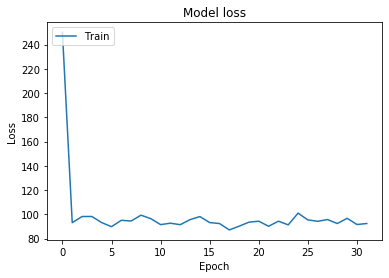

In [20]:
# Plot training & validation accuracy values
# plt.plot(history.history['metrics'])
# # plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.